
game area looks more or less like this \
https://boardgamegeek.com/image/7786608/mlem-space-agency \
for now, distance maximizing will happen. potential for ML for points maximizing is there, but in future release


In [3]:
dice_dictionary = {
    1 : 1,
    2 : 2, 
    3 : 3,
    4 : 4,
    5 : 2, 
    6 : "booster"
} #kitty dice has 2 on two different faces

game_area_dictionary = {
    0 : [1, 2, "booster"],
    1 : [1, 3, "booster"],
    2 : [1, 3, "booster"],
    3 : [2, 3, "booster"],
    4 : [1, 4], 
    5 : [1, 2, "booster"], 
    6 : [1, 2 ,4],
    7 : [1, 2],
    8 : [1, 3],
    9 : [2, 4],
    10: [1, 3, 4],
    11: [1, "booster"],
    12: [3, "booster"],
    13: [1, 3],
    14: [3, 4],
    15: [1, "booster"],
    16: [1, 2, 4],
    17: [2, 3, 4],
    18: [1, 4, "booster"],
    19: [1, "booster"],
    20: [2, 3],
    21: [2, "booster"],
    22: [4, "booster"],
    23: [3, "booster"],
    24: [2, "booster"],
    25: [1, "booster"]
}

double_booster_list = [2, 5, 12, 15, 21]
# triple_booster_list = [19] #only one triple booster like that

In [4]:
current_field = 0
game_area_dictionary[current_field]

[1, 2, 'booster']

In [5]:
import random
def roll_dices(available_dices): #takes the number of available dices, returns a list of integers between 1 and 6 posing as dice walls 
    return [random.randint(1, 6) for _ in range(available_dices)] 

def translate_dice(rolled_list): #translate regular dice into kitty dice. can be incorporated into roll dice but left here for readability purposes
    #takes in a list of integers, returns translated into dictionary.
    kitty_dices = []
    for i in rolled_list:
        kitty_dices.append(dice_dictionary[i])
    
    return kitty_dices

def check_possibilities(current_field, kitty_dices):
    possibilities = []
    for dice_i in kitty_dices:
        if dice_i in game_area_dictionary[current_field]:
            possibilities.append(dice_i)
            
    return possibilities

def make_decision(current_field, possibilities):
    if not possibilities:
        return False #break the game if there are no legal moves, thus loose rocket 
    elif "booster" in possibilities:
        if current_field in double_booster_list:
            return (possibilities.count("booster") * 2, "booster" )#workaround, just skip checking the number of dices when using boosters
        elif current_field == 19: #only one triple booster, might as well skip the list
            return (possibilities.count("booster") * 3, "booster" )
        return (possibilities.count("booster"), "booster" )#always go for the booster if possible. really should just disguise booster as a number to avoid mixing types
    else:
        for i in range(4,0,-1):#maximize output from our dice
            if i in possibilities:
                return (possibilities.count(i), i)











In [6]:
#starting conditions
current_field = 0
available_dices = 6

In [15]:
def main_loop(current_field,available_dices):

    while current_field < 26:
        
        rolled_dices = roll_dices(available_dices)
        translated_dices = translate_dice(rolled_dices)
        possibilities = check_possibilities(current_field, translated_dices)
        decision = make_decision(current_field, possibilities)
        if decision is False:
            # print('crash')
            break #rocket crashes
        else:
            used_dices, dice_type = decision #could do it with "try"  
        
            if dice_type == "booster": #movement, dont loose dices with boosters
                current_field = min(26,current_field + used_dices )
            else:
                current_field = min(26,current_field + used_dices * dice_type)
                available_dices = max(1, available_dices - used_dices)

    # print(rolled_dices, translated_dices, possibilities, decision, current_field)
    return current_field

In [16]:
for i in range(1,7):

    print(make_decision(6,check_possibilities(i,translate_dice(roll_dices(6)))))

(1, 'booster')
(1, 'booster')
(3, 2)
(1, 4)
(2, 'booster')
(2, 4)


In [17]:
import numpy as np

In [18]:

def combo_game_loop(starting_field): 
    results_list = []
    for i in range(1000000):
        current_field = starting_field
        available_dices = 6
        current_field = main_loop(current_field, available_dices)
        results_list.append(current_field)
    return np.array(results_list)
        # print(current_field)

In [19]:
import timeit

In [20]:
import time
start_time = time.time()
result = combo_game_loop(0) #starting from zero
print("--- %s seconds ---" % (time.time() - start_time))


--- 7.703789710998535 seconds ---


In [21]:
import matplotlib.pyplot as plt

(array([  1434.,   6494.,   8347.,    600.,  59408.,   2484.,   6200.,
         15379.,  91910.,  38595.,  38227., 111107.,  88516.,  77326.,
         94070.,  33203.,  16806.,  19120.,  41227.,  46519.,  34251.,
         14303.,  52372.,  36241.,   8810.,   5927.,  51124.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

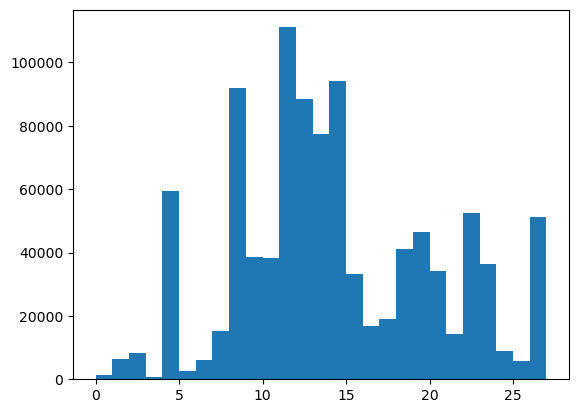

In [36]:
plt.hist(result, bins=range(min(result), max(result)+2))

In [37]:
from collections import Counter

In [38]:
counter = Counter(result)
sorted_counter = sorted(counter.items())
print("Value | frequency  | % chance")
print("----------------------------------")
for value, frequency in sorted_counter:
    print(f"{value:^6} | {frequency:^9} | {frequency/10000:^12}")

Value | frequency  | % chance
----------------------------------
  0    |   1434    |    0.1434   
  1    |   6494    |    0.6494   
  2    |   8347    |    0.8347   
  3    |    600    |     0.06    
  4    |   59408   |    5.9408   
  5    |   2484    |    0.2484   
  6    |   6200    |     0.62    
  7    |   15379   |    1.5379   
  8    |   91910   |    9.191    
  9    |   38595   |    3.8595   
  10   |   38227   |    3.8227   
  11   |  111107   |   11.1107   
  12   |   88516   |    8.8516   
  13   |   77326   |    7.7326   
  14   |   94070   |    9.407    
  15   |   33203   |    3.3203   
  16   |   16806   |    1.6806   
  17   |   19120   |    1.912    
  18   |   41227   |    4.1227   
  19   |   46519   |    4.6519   
  20   |   34251   |    3.4251   
  21   |   14303   |    1.4303   
  22   |   52372   |    5.2372   
  23   |   36241   |    3.6241   
  24   |   8810    |    0.881    
  25   |   5927    |    0.5927   
  26   |   51124   |    5.1124   


In [25]:
start_time = time.time()
result_sattelite = combo_game_loop(3) #starting from the sattelite
print("--- %s seconds ---" % (time.time() - start_time))


--- 6.809640169143677 seconds ---


(array([ 1378., 35251.,   515.,  1019.,  5974., 30144., 20850., 12706.,
        74880., 82283., 95389., 94858., 51345., 22796., 24771., 54716.,
        70213., 54037., 24569., 79256., 57917., 14296., 10691., 80146.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.]),
 <BarContainer object of 24 artists>)

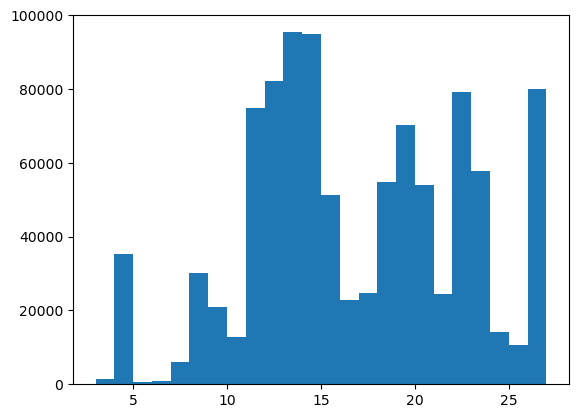

In [34]:
plt.hist(result_sattelite, bins=range(min(result_sattelite), max(result_sattelite)+2), alpha=1, label='sattelite start')

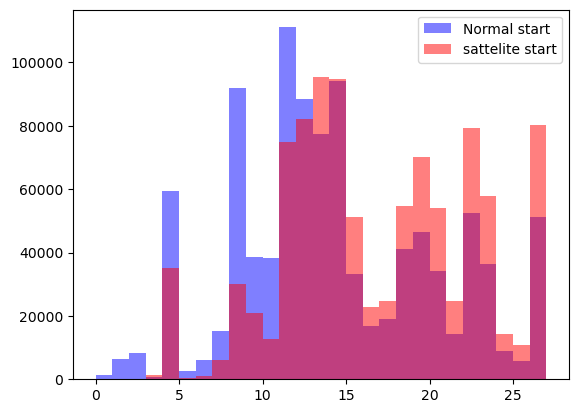

In [31]:
plt.hist(result, bins=range(min(result), max(result)+2), alpha=0.5, label='Normal start', color='b')
plt.hist(result_sattelite, bins=range(min(result_sattelite), max(result_sattelite)+2), alpha=0.5, label='sattelite start', color='red')

plt.legend()
plt.show()
#using sattelite increases the expected distance quite significantly

In [39]:
counter2 = Counter(result_sattelite)
sorted_counter2 = sorted(counter2.items())
print("Value | frequency  | % chance")
print("----------------------------------")
for value, frequency in sorted_counter2:
    print(f"{value:^6} | {frequency:^9} | {frequency/10000:^12}")

Value | frequency  | % chance
----------------------------------
  3    |   1378    |    0.1378   
  4    |   35251   |    3.5251   
  5    |    515    |    0.0515   
  6    |   1019    |    0.1019   
  7    |   5974    |    0.5974   
  8    |   30144   |    3.0144   
  9    |   20850   |    2.085    
  10   |   12706   |    1.2706   
  11   |   74880   |    7.488    
  12   |   82283   |    8.2283   
  13   |   95389   |    9.5389   
  14   |   94858   |    9.4858   
  15   |   51345   |    5.1345   
  16   |   22796   |    2.2796   
  17   |   24771   |    2.4771   
  18   |   54716   |    5.4716   
  19   |   70213   |    7.0213   
  20   |   54037   |    5.4037   
  21   |   24569   |    2.4569   
  22   |   79256   |    7.9256   
  23   |   57917   |    5.7917   
  24   |   14296   |    1.4296   
  25   |   10691   |    1.0691   
  26   |   80146   |    8.0146   
